In [53]:
from fair_cc_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def means(n, iteration=10):
    unfair_mean, fair_mean = [], []
    for i in range(4,n+1, 2):
        unfair_val, fair_val = [], []
        # create unfair graph
        unfair_graph = generate_complete_graph(i)
        # create fairlets and fair graph
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        for j in range(iteration):
            # calculate unfair cluster and its costs
            unfair_cluster = cc_pivot(unfair_graph)
            unfair_val.append(cost(unfair_cluster, unfair_graph))
            # calculate fair cluster and its costs
            fair_cluster = cc_pivot(fair_graph)
            fair_val.append(cost(fair_cluster, unfair_graph))
        unfair_mean.append(np.mean(unfair_val))
        fair_mean.append(np.mean(fair_val))
    return unfair_mean, fair_mean

# same as means, but returns maximum found after certain amount of iterations
def maxs(n, iteration=10):
    unfair_maxs, fair_maxs = [], []
    for i in range(4,n+1, 2):
        unfair_max, fair_max = 0, 0
        # generate unfair graph
        unfair_graph = generate_complete_graph(i)
        # generate fair graph
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        for j in range(iteration):
            if fair_max == n**2/4: continue
            # compute unfair cluster and calculate costs
            unfair_cluster = cc_pivot(unfair_graph)
            unfair_costs = cost(unfair_cluster, unfair_graph)
            if unfair_costs > unfair_max: unfair_max = unfair_costs
            # compute fair cluster and calculate costs
            fair_cluster = cc_pivot(fair_graph)
            fair_costs = cost(fair_cluster, unfair_graph)
            if fair_costs > fair_max: fair_max = fair_costs
        unfair_maxs.append(unfair_max)
        fair_maxs.append(fair_max)
    return unfair_maxs, fair_maxs

In [49]:
unfair_max, fair_max = maxs(50, iteration=20)

In [50]:
unfair_mean, fair_mean = means(50, iteration=20)

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[2, 5, 7, 9, 11, 11, 14, 15, 15, 12, 22, 19, 15, 32, 11, 13, 32, 21, 44, 37, 41, 44, 34, 49]


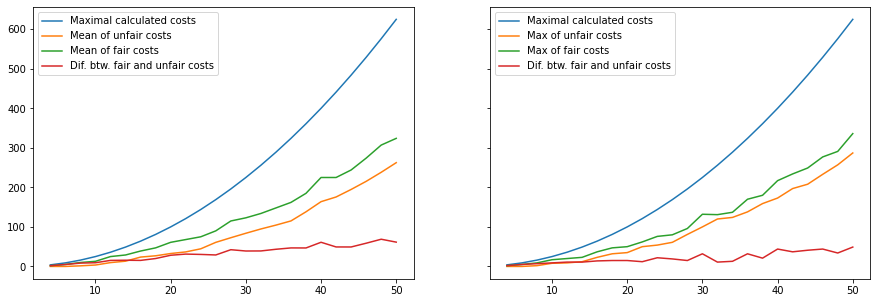

In [54]:
nodes = [i for i in range(4,51,2)]
max_calc_cost = [i**2/4 for i in range(4,51,2)]
mean_dif = [i-j for i,j in zip(fair_mean, unfair_mean)]
max_dif = [i-j for i,j in zip(fair_max, unfair_max)]

print(nodes)
print(max_dif)

# note:
# no use of the same graphs in max and mean!!
fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)
ax[0].plot(nodes, max_calc_cost, label='Maximal calculated costs')
ax[0].plot(nodes, unfair_mean, label='Mean of unfair costs')
ax[0].plot(nodes, fair_mean, label='Mean of fair costs')
ax[0].plot(nodes, mean_dif, label='Dif. btw. fair and unfair costs')
ax[0].legend()
ax[1].plot(nodes, max_calc_cost, label='Maximal calculated costs')
ax[1].plot(nodes, unfair_max, label='Max of unfair costs')
ax[1].plot(nodes, fair_max, label='Max of fair costs')
ax[1].plot(nodes, max_dif, label='Dif. btw. fair and unfair costs')
ax[1].legend()
plt.show()